# Pizza Shop Recommender using k-Nearest Neighbors (k-NN)

In this project, we’ll understand the k-NN algorithm through a fun and relatable example: choosing a pizza shop based on what our friends preferred!  
You'll see how machine learning can work even with everyday decisions.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

#for clean visuals
sns.set(style = "whitegrid")

## Step 1: Let’s Load Our Pizza Data

We collected some data from 10 friends about pizza shops they visited, including:
- Distance from home  
- Price level (1 to 5)  
- Rating (1 to 5)  
- Whether they chose that pizza shop or not (1 = Yes, 0 = No)

We’ll use this to train our k-NN model.


In [3]:
df = pd.read_csv("/content/pizza_friends_data.csv")
df

,Friend,Distance_km,Price_Level,Rating,Chose_Shop
0,A,1.2,2,4.5,1
1,B,2.5,3,4.0,1
2,C,0.8,1,3.5,1
3,D,3.1,5,4.8,0
4,E,2.0,4,3.0,0
5,F,1.0,2,4.2,1
6,G,2.8,3,2.5,0
7,H,1.7,3,3.8,1
8,I,3.5,4,4.1,0
9,J,0.5,1,3.9,1


In [4]:
print(df.info())
print("\nSummary Statistics:\n")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Friend       10 non-null     object 
 1   Distance_km  10 non-null     float64
 2   Price_Level  10 non-null     int64  
 3   Rating       10 non-null     float64
 4   Chose_Shop   10 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 532.0+ bytes
None

Summary Statistics:

       Distance_km  Price_Level     Rating  Chose_Shop
count    10.000000    10.000000  10.000000   10.000000
mean      1.910000     2.800000   3.830000    0.600000
std       1.037572     1.316561   0.683211    0.516398
min       0.500000     1.000000   2.500000    0.000000
25%       1.050000     2.000000   3.575000    0.000000
50%       1.850000     3.000000   3.950000    1.000000
75%       2.725000     3.750000   4.175000    1.000000
max       3.500000     5.000000   4.800000    1.000000


## Step 2: Visual Exploration

Before training any ML model, it’s important to understand the data.  
Here, we’ll visually explore how distance and rating influence pizza choices.


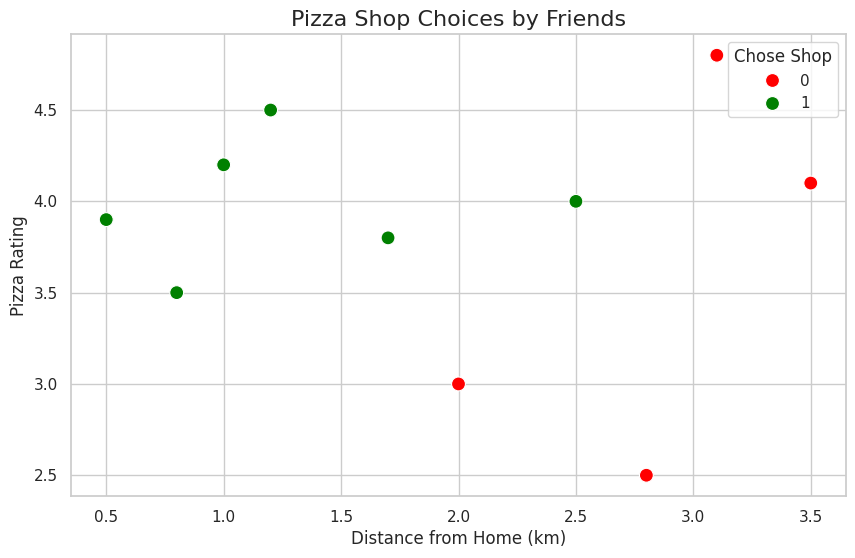

In [5]:
plt.figure(figsize=(10, 6))
palette = {1: "green", 0: "red"}
sns.scatterplot(data=df, x="Distance_km", y="Rating", hue="Chose_Shop", s=100, palette=palette)
plt.title("Pizza Shop Choices by Friends", fontsize = 16)
plt.xlabel("Distance from Home (km)")
plt.ylabel("Pizza Rating")
plt.legend(title="Chose Shop")
plt.show()

## Step 3: Preprocessing for Machine Learning

ML models work better when features are scaled (especially distance-based models like k-NN).  
So we will normalize the distance, price, and rating using `StandardScaler`.


In [7]:
X = df[["Distance_km", "Price_Level", "Rating"]]
y = df["Chose_Shop"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 4: What About You?

Let’s assume you are also deciding whether to go to a pizza shop.  
You enter:
- Distance = 1.5 km  
- Price Level = 3  
- Rating = 4.0

Let’s see if the model thinks **you’ll choose this shop**, based on your friends’ choices.


In [8]:
your_input = pd.DataFrame({"Distance_km": [1.5], "Price_Level": [3], "Rating": [4.0]})
your_input_scaled = scaler.transform(your_input)

## Step 5: Train a k-NN Model

Now, we’ll train a k-NN classifier using k = 3 (i.e., we’ll check the 3 nearest friends to make a decision for you).


In [9]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

prediction = knn.predict(your_input_scaled)[0]
print("Would you choose this pizza shop?","Yes" if prediction == 1 else "No")

Would you choose this pizza shop? Yes


## Step 6: How k Affects Prediction

Let’s test different `k` values (from 1 to 7) to see how it changes the prediction.  
This helps us understand why choosing the right `k` is important.


In [10]:
print("Predictions with different k values:")
for k in range(1, 8):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_scaled, y)
  pred = model.predict(your_input_scaled)[0]
  print(f"k = {k}: {'Yes' if pred == 1 else 'No'}")

Predictions with different k values:
k = 1: Yes
k = 2: Yes
k = 3: Yes
k = 4: Yes
k = 5: Yes
k = 6: Yes
k = 7: Yes


## Step 7: See Your Nearest Friends

This is a bonus visualization to literally **see** which friends are closest to you and how they influenced your result.  
Each dotted line connects you to a friend considered during prediction.


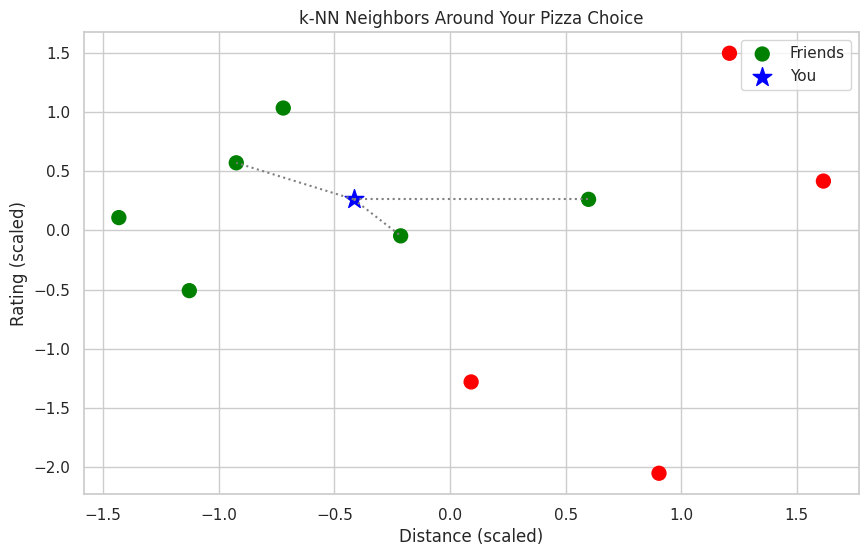

In [11]:
from sklearn.metrics import pairwise_distances

X_with_you = np.vstack([X_scaled, your_input_scaled])
y_with_you = list(y) + [-1]

distances = pairwise_distances([your_input_scaled[0]], X_scaled)[0]
nearest_indices = distances.argsort()[:3]

plt.figure(figsize=(10, 6))
colors = ["green" if label == 1 else "red" for label in y]
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=colors, s=100, label="Friends")

plt.scatter(your_input_scaled[0][0], your_input_scaled[0][2], c="blue", s=200, label="You", marker="*")

for i in nearest_indices:
    plt.plot(
        [your_input_scaled[0][0], X_scaled[i][0]],
        [your_input_scaled[0][2], X_scaled[i][2]],
        color='gray', linestyle='dotted'
    )

plt.xlabel("Distance (scaled)")
plt.ylabel("Rating (scaled)")
plt.title("k-NN Neighbors Around Your Pizza Choice")
plt.legend()
plt.show()

## Conclusion: What We Learned

- k-NN predicts based on how similar other data points are.
- The choice of `k` and feature scaling matters a lot.
- We used a relatable example to understand a core ML concept.

You can use this same idea for recommending restaurants, products, or even college branches!
